In [1]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


## Initializing NewsApiClient with API Key

In [11]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='6681a13517fe4af5b0977eb8eea7ed8d')

## Importing Libraries

In [3]:
# importing pandas, numpy, regression package.
import pandas as pd
import numpy as np
import re 

## Retrieving Top Headlines Related to "Baltimore Bridge" in English

In [4]:
# Get top headlines related to world in English
top_headlines = newsapi.get_top_headlines(q='Baltimore bridge', language='en')

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    print()  # Empty line for readability
print(top_headlines)

Title: How the Baltimore Bridge collapse could impact the environment - The Washington Post
Source: The Washington Post
Published At: 2024-03-30T11:37:19Z
Description: Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.
URL: https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/

Title: Joe Biden is set to visit Baltimore after Key Bridge collapse: ‘We’re with you’ - Hindustan Times
Source: Hindustan Times
Published At: 2024-03-30T07:31:46Z
Description: President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.
URL: https://www.hindustantimes.com/world-news/us-news/joe-biden-is-set-to-visit-baltimore-after-key-bridge-collapse-we-re-with-you-101711774458875.html

{'status': 'ok', 'totalResults': 2, 'articles': [{'source': {'id': 'the-washington-post', 'name': 'The Was

## Text Summarizing Article Description

In [5]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Extract the description
description = article['description']
    
# Preprocess the text (if needed)
# Here, we'll directly use the description for summarization
    
# Apply text summarization
parser = PlaintextParser.from_string(description, Tokenizer("english"))
summarizer = LsaSummarizer()
summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
# Print the summary
print("Summary:")
for sentence in summary:
    print(sentence)
    
print()  # Empty line for readability

print(top_headlines)

Summary:
President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.

{'status': 'ok', 'totalResults': 2, 'articles': [{'source': {'id': 'the-washington-post', 'name': 'The Washington Post'}, 'author': 'Nicolás Rivero', 'title': 'How the Baltimore Bridge collapse could impact the environment - The Washington Post', 'description': 'Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.', 'url': 'https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/', 'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/TMGCTMVMDI5I4QP4ZSZSVXTBE4.jpg&w=1440', 'publishedAt': '2024-03-30T11:37:19Z', 'content': 'Return to menuThe Key Bridge collapsed amid a decades-long effort to clean up industrial pollution

## Extracting and Text Summarizing Top Headlines Articles

In [6]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Preprocess the text (if needed)
    # Here, we'll directly use the description for summarization
    
    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
    # Print the summary
    print("Summary:")
    for sentence in summary:
        print(sentence)
    print()  # Empty line for readability

print(top_headlines)

Title: How the Baltimore Bridge collapse could impact the environment - The Washington Post
Source: The Washington Post
Published At: 2024-03-30T11:37:19Z
Description: Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.
URL: https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/
Summary:
There is a sheen in the water.
Recovery work runs the risk of stirring up toxic sediments.

Title: Joe Biden is set to visit Baltimore after Key Bridge collapse: ‘We’re with you’ - Hindustan Times
Source: Hindustan Times
Published At: 2024-03-30T07:31:46Z
Description: President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.
URL: https://www.hindustantimes.com/world-news/us-news/joe-biden-is-set-to-visit-baltimore-after-key-bridge-collapse-we-re-with-you-101711774458875.html
Summary

## LDA Model

In [7]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from gensim import corpora, models

# Define the number of topics
num_topics = 5

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
    # Print the summary
    print("Summary:")
    for sentence in summary:
        print(sentence)
    print()  # Empty line for readability
    
    # Perform LDA for topic modeling
    # Tokenize the description
    tokens = description.split()
    
    # Create a dictionary from the tokens
    dictionary = corpora.Dictionary([tokens])
    
    # Create a corpus from the dictionary
    corpus = [dictionary.doc2bow(tokens)]
    
    # Apply LDA model
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    
    # Print the topics
    print("Topics:")
    for topic in lda_model.print_topics():
        print(topic)
    print()  # Empty line for readability

print(top_headlines)

Title: How the Baltimore Bridge collapse could impact the environment - The Washington Post
Source: The Washington Post
Published At: 2024-03-30T11:37:19Z
Description: Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.
URL: https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/
Summary:
There is a sheen in the water.
Recovery work runs the risk of stirring up toxic sediments.

Topics:
(0, '0.045*"runs" + 0.045*"Containers" + 0.045*"toxic" + 0.045*"risk" + 0.045*"There" + 0.045*"is" + 0.045*"the" + 0.045*"of" + 0.045*"water." + 0.045*"a"')
(1, '0.046*"the" + 0.045*"carrying" + 0.045*"There" + 0.045*"Recovery" + 0.045*"were" + 0.045*"damaged." + 0.045*"in" + 0.045*"risk" + 0.045*"toxic" + 0.045*"a"')
(2, '0.045*"the" + 0.045*"There" + 0.045*"a" + 0.045*"Containers" + 0.045*"runs" + 0.045*"damaged." + 0.045*"carrying" + 0.045*"Rec

## Visualizing Topic Model with pyLDAvis

In [8]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Assuming lda_model, corpus, and dictionary are already defined

# Prepare the visualization
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_display)

## Word Cloud for Top Headlines Descriptions

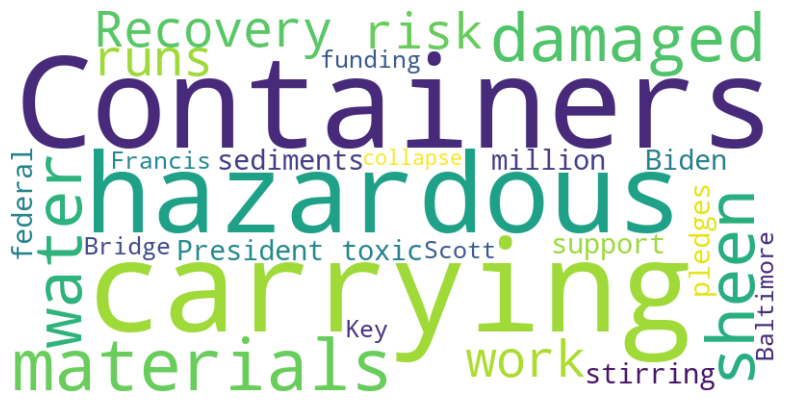

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize an empty string to store all descriptions
all_descriptions = ""

# Extracting information from each article in the response
for article in top_headlines['articles']:
    # Extract the description
    description = article['description']
    
    # Append the description to all_descriptions
    all_descriptions += description + " "

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Clouds for Topics Extracted from News Article Descriptions using LDA

Title: How the Baltimore Bridge collapse could impact the environment - The Washington Post
Source: The Washington Post
Published At: 2024-03-30T11:37:19Z
Description: Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.
URL: https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/
Summary:
There is a sheen in the water.
Recovery work runs the risk of stirring up toxic sediments.

Topics for num_topics=3:
(0, '0.053*"the" + 0.049*"risk" + 0.049*"materials" + 0.048*"There" + 0.047*"up" + 0.046*"damaged." + 0.046*"hazardous" + 0.046*"sheen" + 0.046*"Recovery" + 0.045*"of"')
(1, '0.053*"the" + 0.049*"There" + 0.048*"toxic" + 0.048*"Recovery" + 0.048*"were" + 0.048*"water." + 0.047*"sheen" + 0.047*"risk" + 0.046*"sediments." + 0.046*"work"')
(2, '0.079*"the" + 0.047*"stirring" + 0.045*"Containers" + 0.045*"of" + 0.045*"in" + 0.045*"run

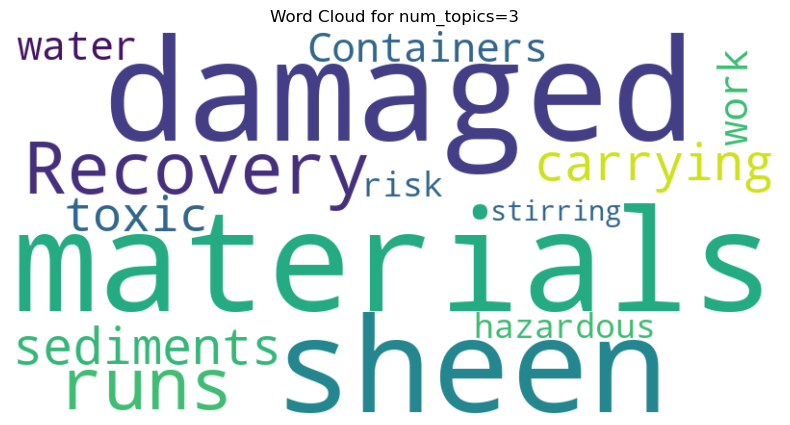

Topics for num_topics=5:
(0, '0.045*"the" + 0.045*"toxic" + 0.045*"Containers" + 0.045*"a" + 0.045*"up" + 0.045*"risk" + 0.045*"in" + 0.045*"damaged." + 0.045*"of" + 0.045*"Recovery"')
(1, '0.074*"the" + 0.052*"There" + 0.050*"stirring" + 0.050*"Containers" + 0.048*"risk" + 0.047*"a" + 0.047*"in" + 0.047*"is" + 0.045*"Recovery" + 0.044*"sediments."')
(2, '0.045*"in" + 0.045*"a" + 0.045*"the" + 0.045*"Recovery" + 0.045*"is" + 0.045*"toxic" + 0.045*"There" + 0.045*"materials" + 0.045*"of" + 0.045*"damaged."')
(3, '0.045*"in" + 0.045*"toxic" + 0.045*"runs" + 0.045*"the" + 0.045*"Containers" + 0.045*"a" + 0.045*"up" + 0.045*"is" + 0.045*"risk" + 0.045*"materials"')
(4, '0.077*"the" + 0.052*"up" + 0.049*"of" + 0.049*"were" + 0.047*"materials" + 0.047*"carrying" + 0.046*"toxic" + 0.046*"damaged." + 0.045*"water." + 0.045*"runs"')



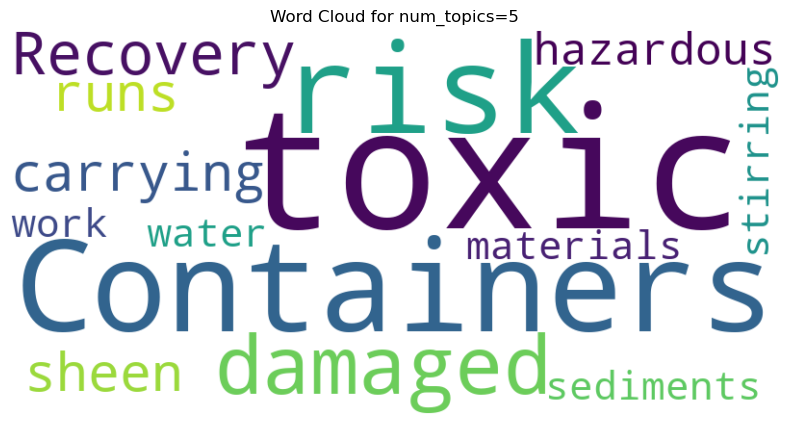

Topics for num_topics=7:
(0, '0.063*"the" + 0.054*"is" + 0.049*"carrying" + 0.049*"a" + 0.048*"up" + 0.047*"of" + 0.047*"Containers" + 0.046*"work" + 0.046*"sheen" + 0.045*"risk"')
(1, '0.045*"the" + 0.045*"materials" + 0.045*"carrying" + 0.045*"Containers" + 0.045*"Recovery" + 0.045*"runs" + 0.045*"hazardous" + 0.045*"water." + 0.045*"sheen" + 0.045*"in"')
(2, '0.045*"the" + 0.045*"Containers" + 0.045*"carrying" + 0.045*"hazardous" + 0.045*"up" + 0.045*"sediments." + 0.045*"a" + 0.045*"runs" + 0.045*"risk" + 0.045*"in"')
(3, '0.057*"the" + 0.050*"Containers" + 0.049*"in" + 0.049*"sheen" + 0.047*"stirring" + 0.047*"damaged." + 0.047*"Recovery" + 0.046*"a" + 0.045*"work" + 0.045*"carrying"')
(4, '0.045*"the" + 0.045*"in" + 0.045*"carrying" + 0.045*"Recovery" + 0.045*"hazardous" + 0.045*"materials" + 0.045*"Containers" + 0.045*"work" + 0.045*"a" + 0.045*"risk"')
(5, '0.045*"the" + 0.045*"Containers" + 0.045*"risk" + 0.045*"runs" + 0.045*"of" + 0.045*"in" + 0.045*"There" + 0.045*"material

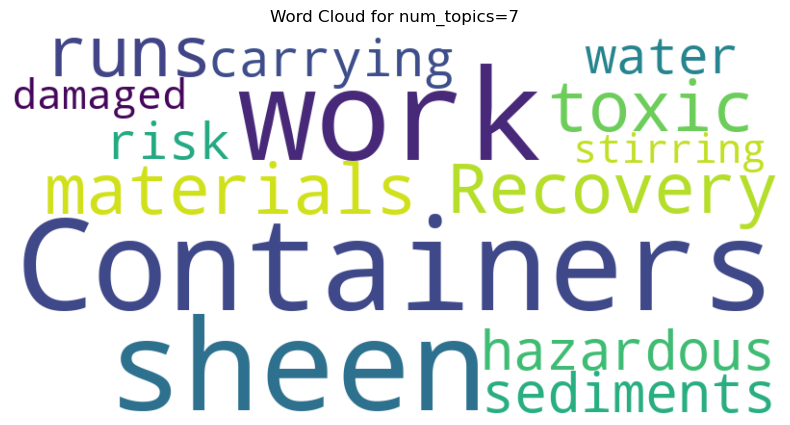

Title: Joe Biden is set to visit Baltimore after Key Bridge collapse: ‘We’re with you’ - Hindustan Times
Source: Hindustan Times
Published At: 2024-03-30T07:31:46Z
Description: President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.
URL: https://www.hindustantimes.com/world-news/us-news/joe-biden-is-set-to-visit-baltimore-after-key-bridge-collapse-we-re-with-you-101711774458875.html
Summary:
President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.

Topics for num_topics=3:
(0, '0.060*"Biden" + 0.058*"Scott" + 0.058*"after" + 0.057*"Key" + 0.056*"Bridge" + 0.056*"million" + 0.056*"pledges" + 0.055*"federal" + 0.055*"Francis" + 0.055*"$60"')
(1, '0.060*"Francis" + 0.058*"Scott" + 0.058*"for" + 0.057*"collapse." + 0.057*"federal" + 0.057*"funding" + 0.056*"$60" + 0.056*"support" + 0.056*"Bridge" + 0.055*"in"')
(2, '0.061*"Biden" + 0.059*"Baltimore" + 0.058*"Ke

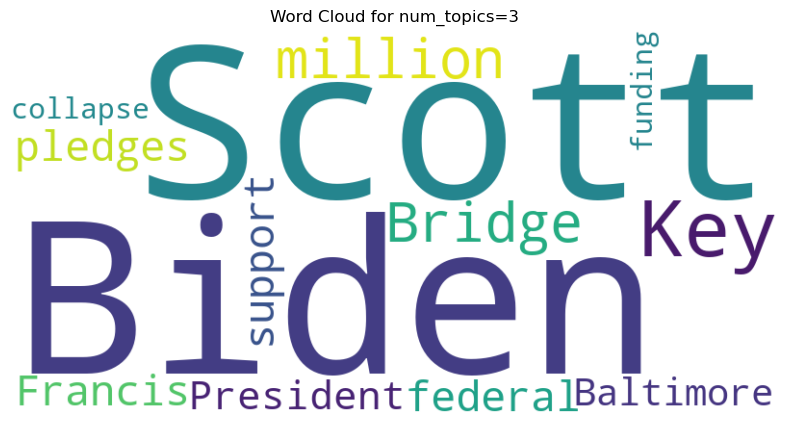

Topics for num_topics=5:
(0, '0.056*"Baltimore" + 0.056*"$60" + 0.056*"pledges" + 0.056*"federal" + 0.056*"Bridge" + 0.056*"in" + 0.056*"President" + 0.056*"million" + 0.056*"Scott" + 0.056*"after"')
(1, '0.056*"$60" + 0.056*"after" + 0.056*"Baltimore" + 0.056*"million" + 0.056*"federal" + 0.056*"pledges" + 0.056*"in" + 0.056*"for" + 0.056*"and" + 0.056*"President"')
(2, '0.056*"Baltimore" + 0.056*"Bridge" + 0.056*"after" + 0.056*"Biden" + 0.056*"for" + 0.056*"$60" + 0.056*"pledges" + 0.056*"million" + 0.056*"in" + 0.056*"collapse."')
(3, '0.056*"$60" + 0.056*"Scott" + 0.056*"Baltimore" + 0.056*"pledges" + 0.056*"after" + 0.056*"Bridge" + 0.056*"million" + 0.056*"collapse." + 0.056*"for" + 0.056*"funding"')
(4, '0.056*"support" + 0.056*"Francis" + 0.056*"Key" + 0.056*"funding" + 0.056*"and" + 0.056*"President" + 0.056*"Scott" + 0.056*"Biden" + 0.056*"collapse." + 0.056*"federal"')



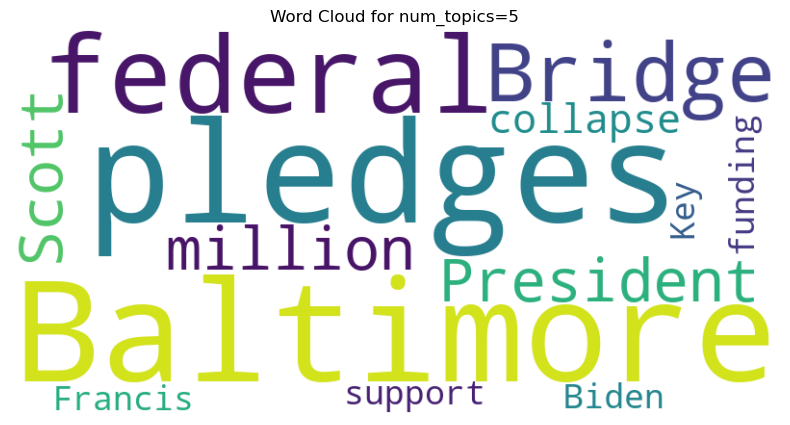

Topics for num_topics=7:
(0, '0.056*"in" + 0.056*"Scott" + 0.056*"collapse." + 0.056*"President" + 0.056*"Bridge" + 0.056*"Biden" + 0.056*"pledges" + 0.056*"for" + 0.056*"Francis" + 0.056*"Key"')
(1, '0.056*"and" + 0.056*"funding" + 0.056*"support" + 0.056*"after" + 0.056*"Baltimore" + 0.056*"million" + 0.056*"Biden" + 0.056*"federal" + 0.056*"$60" + 0.056*"collapse."')
(2, '0.056*"after" + 0.056*"and" + 0.056*"$60" + 0.056*"funding" + 0.056*"support" + 0.056*"for" + 0.056*"million" + 0.056*"Biden" + 0.056*"Baltimore" + 0.056*"federal"')
(3, '0.056*"Key" + 0.056*"federal" + 0.056*"Baltimore" + 0.056*"and" + 0.056*"support" + 0.056*"funding" + 0.056*"Francis" + 0.056*"million" + 0.056*"pledges" + 0.056*"$60"')
(4, '0.056*"federal" + 0.056*"and" + 0.056*"million" + 0.056*"Baltimore" + 0.056*"Key" + 0.056*"after" + 0.056*"Francis" + 0.056*"funding" + 0.056*"$60" + 0.056*"pledges"')
(5, '0.056*"Francis" + 0.056*"and" + 0.056*"federal" + 0.056*"funding" + 0.056*"pledges" + 0.056*"Baltimore"

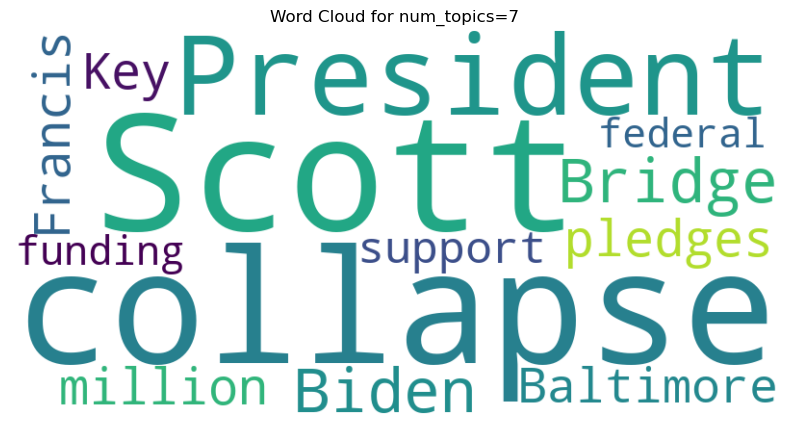

{'status': 'ok', 'totalResults': 2, 'articles': [{'source': {'id': 'the-washington-post', 'name': 'The Washington Post'}, 'author': 'Nicolás Rivero', 'title': 'How the Baltimore Bridge collapse could impact the environment - The Washington Post', 'description': 'Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.', 'url': 'https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/', 'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/TMGCTMVMDI5I4QP4ZSZSVXTBE4.jpg&w=1440', 'publishedAt': '2024-03-30T11:37:19Z', 'content': 'Return to menuThe Key Bridge collapsed amid a decades-long effort to clean up industrial pollution in the Chesapeake Bay and the Patapsco River.\r\nThis watershed and Baltimores waterways have been pla… [+1272 chars]'}, {'source':

In [10]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the number of topics
num_topics = [3, 5, 7]  # Example: You can specify multiple numbers of topics to explore

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
    # Print the summary
    print("Summary:")
    for sentence in summary:
        print(sentence)
    print()  # Empty line for readability
    
    # Perform LDA for topic modeling for each num_topics
    for n in num_topics:
        print(f"Topics for num_topics={n}:")
        # Tokenize the description
        tokens = description.split()
        
        # Create a dictionary from the tokens
        dictionary = corpora.Dictionary([tokens])
        
        # Create a corpus from the dictionary
        corpus = [dictionary.doc2bow(tokens)]
        
        # Apply LDA model
        lda_model = models.LdaModel(corpus, num_topics=n, id2word=dictionary)
        
        # Print the topics
        for topic in lda_model.print_topics():
            print(topic)
        print()  # Empty line for readability
        
        # Generate word cloud for each set of topics
        topics_words = [word for topic, word in lda_model.show_topics(num_words=20, formatted=False)]
        topics_words_combined = ' '.join([word[0] for topic in topics_words for word in topic])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topics_words_combined)
        
        # Plot word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for num_topics={n}")
        plt.axis('off')
        plt.show()

print(top_headlines)